In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("hotel_bookings.csv")

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
len(df)

119390

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
#missing values column
# agent 
# company
# country
# children

In [8]:
df.agent.unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [9]:
df['agent'].mode()

0    9.0
Name: agent, dtype: float64

In [10]:
df.fillna({'agent': 9.0}, inplace=True)

In [11]:
df.agent.head()

0      9.0
1      9.0
2      9.0
3    304.0
4    240.0
Name: agent, dtype: float64

In [12]:
df['agent'] = df['agent'].astype(int)

In [13]:
df.agent.head()

0      9
1      9
2      9
3    304
4    240
Name: agent, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [15]:
df = df.drop('company',axis=1)

In [16]:
df.children.isnull().sum()

np.int64(4)

In [17]:
df.children.unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [18]:
df['children'].median()

np.float64(0.0)

In [19]:
df.fillna({'children': 0.0}, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [21]:
df['country'].isnull().sum()

np.int64(488)

In [22]:
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [23]:
df['country'].mode()

0    PRT
Name: country, dtype: object

In [24]:
#df['country'].fillna(df['country'].mode()[0], inplace=True)
df.fillna({'country': 'PRT'}, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [26]:
# Now the above data does not have any null values
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [27]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [28]:
df['arrival_month'] = df['arrival_date_month'].map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
})

In [29]:
df.arrival_month

0         7
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_month, Length: 119390, dtype: int64

In [30]:
df['total'] = df.adults + df.children + df.babies

In [31]:
df['stay'] = df.stays_in_week_nights + df.stays_in_weekend_nights

In [32]:
df['revenue'] = df.adr*df.stay

In [33]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_month,total,stay,revenue
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,7,2.0,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,7,2.0,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,7,1.0,1,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,7,1.0,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,7,2.0,2,196.0


In [34]:
df['date'] = df['arrival_date_day_of_month'].astype(str) + '-' + \
             df['arrival_date_month'] + '-' + \
             df['arrival_date_year'].astype(str)

# Convert to proper datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%B-%Y')

In [35]:
df.date.unique()

<DatetimeArray>
['2015-07-01 00:00:00', '2015-07-02 00:00:00', '2015-07-03 00:00:00',
 '2015-07-04 00:00:00', '2015-07-05 00:00:00', '2015-07-06 00:00:00',
 '2015-07-07 00:00:00', '2015-07-08 00:00:00', '2015-07-09 00:00:00',
 '2015-07-10 00:00:00',
 ...
 '2017-08-31 00:00:00', '2016-01-20 00:00:00', '2015-12-09 00:00:00',
 '2017-03-21 00:00:00', '2016-01-11 00:00:00', '2015-12-16 00:00:00',
 '2015-11-22 00:00:00', '2016-01-24 00:00:00', '2016-03-06 00:00:00',
 '2016-11-13 00:00:00']
Length: 793, dtype: datetime64[ns]

In [36]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_month,total,stay,revenue,date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,7,2.0,0,0.0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,7,2.0,0,0.0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,7,1.0,1,75.0,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,7,1.0,1,75.0,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,7,2.0,2,196.0,2015-07-01


In [37]:
df.shape

(119390, 36)

In [38]:
df.duplicated().sum()

np.int64(32021)

In [39]:
df.drop_duplicates(inplace=True)

In [40]:
df.shape

(87369, 36)

### Outliers

In [42]:
df.shape

(87366, 36)

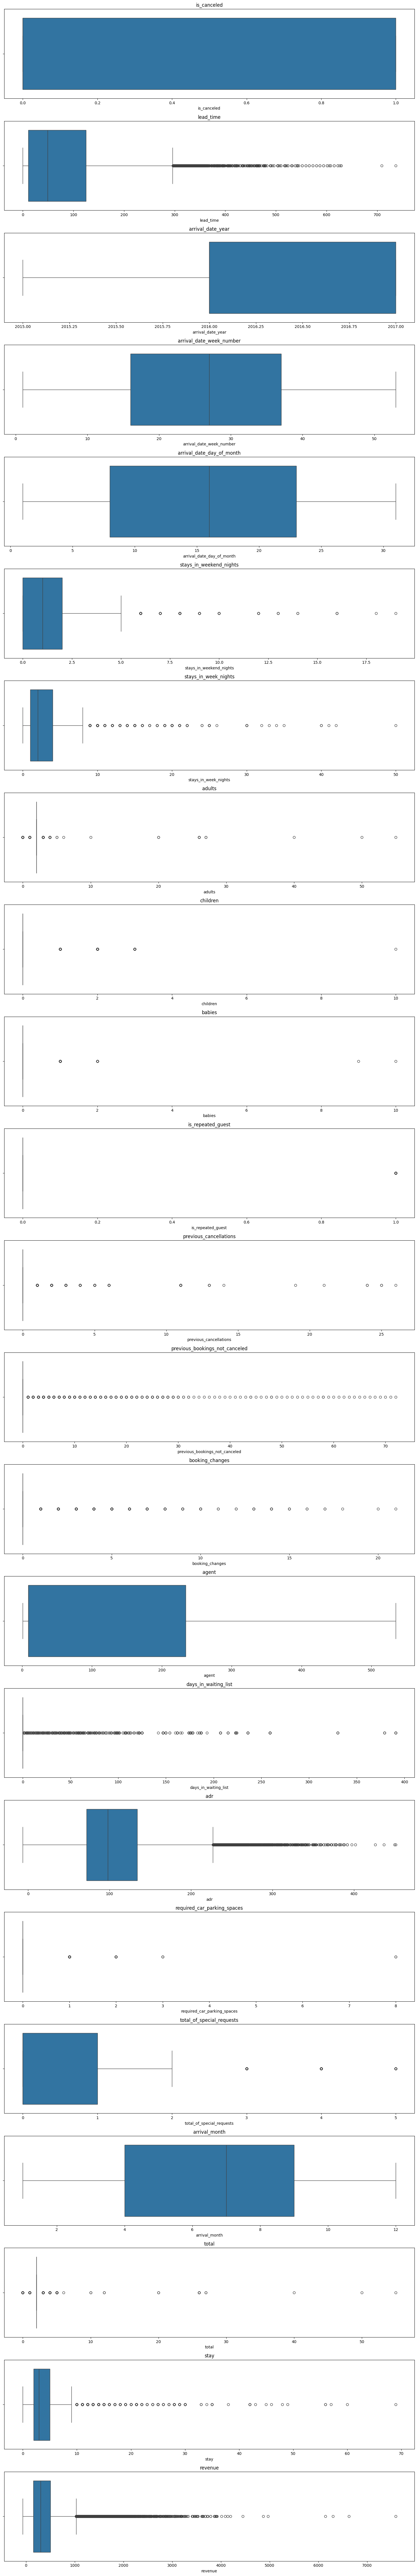

In [43]:
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, len(numeric_cols) * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()

In [41]:
df = df[df['adr'] <= 500]

In [44]:
df.shape

(87366, 36)

### Univariate Analysis

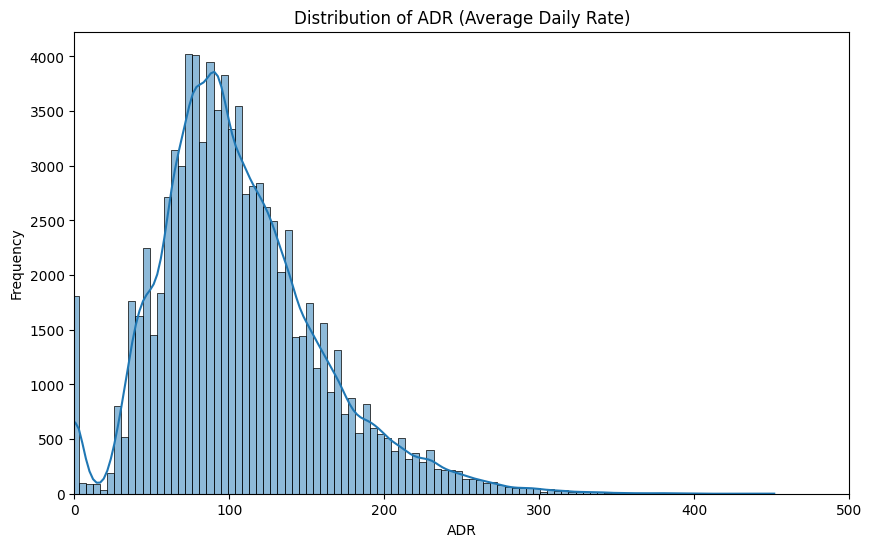

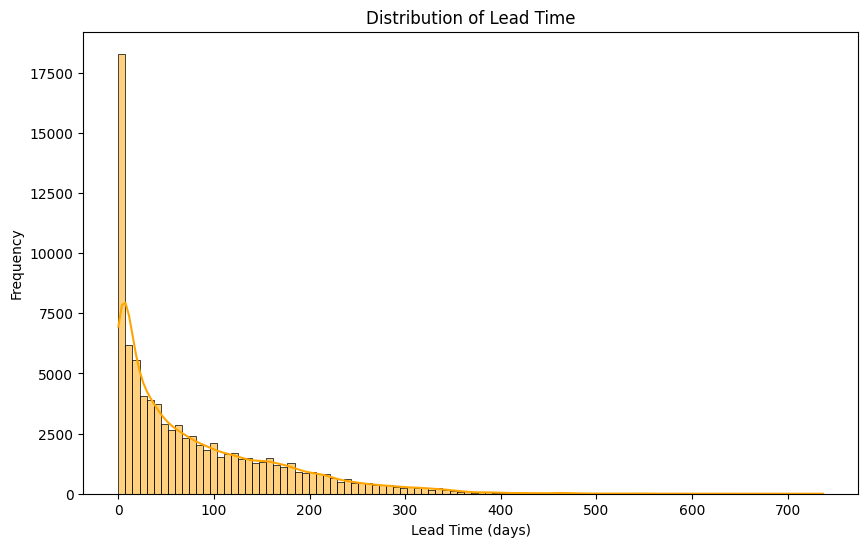

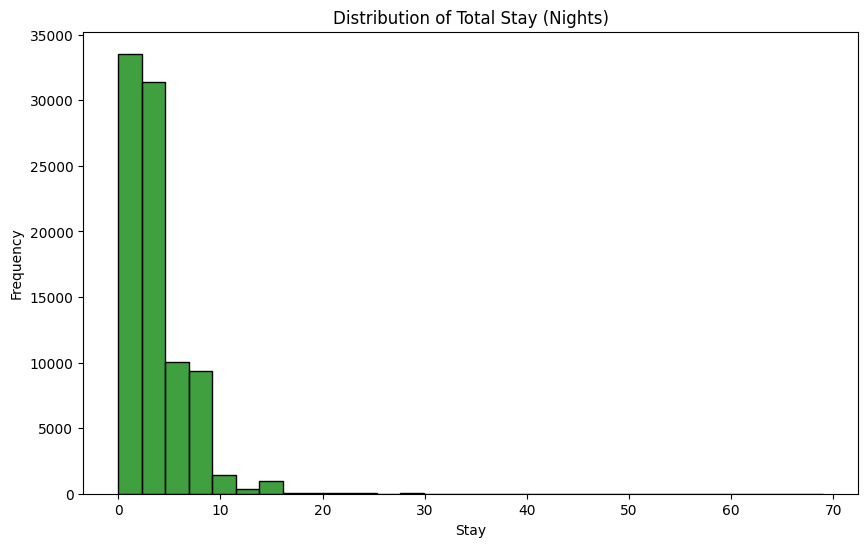

C:\Users\gauta\AppData\Local\Temp\ipykernel_27240\3191427721.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='total', data=df, palette='Set2')


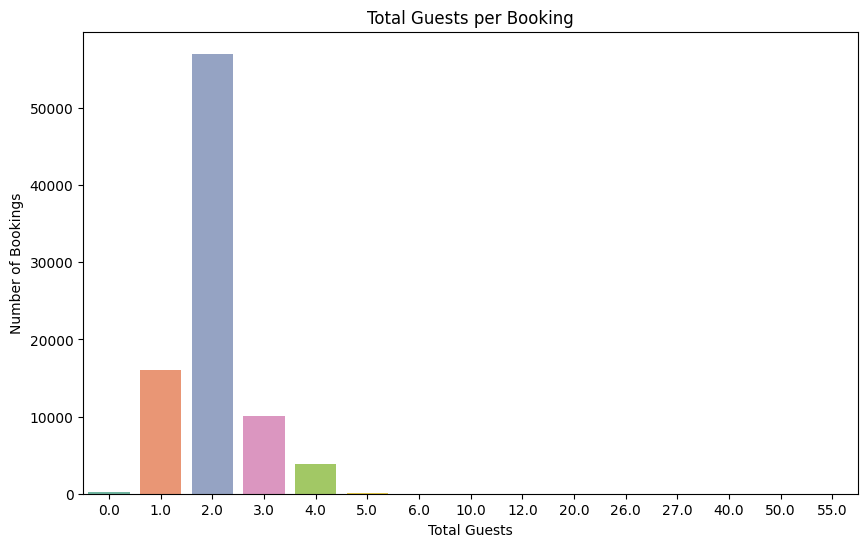

C:\Users\gauta\AppData\Local\Temp\ipykernel_27240\3191427721.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='total_of_special_requests', data=df, palette='Set3')


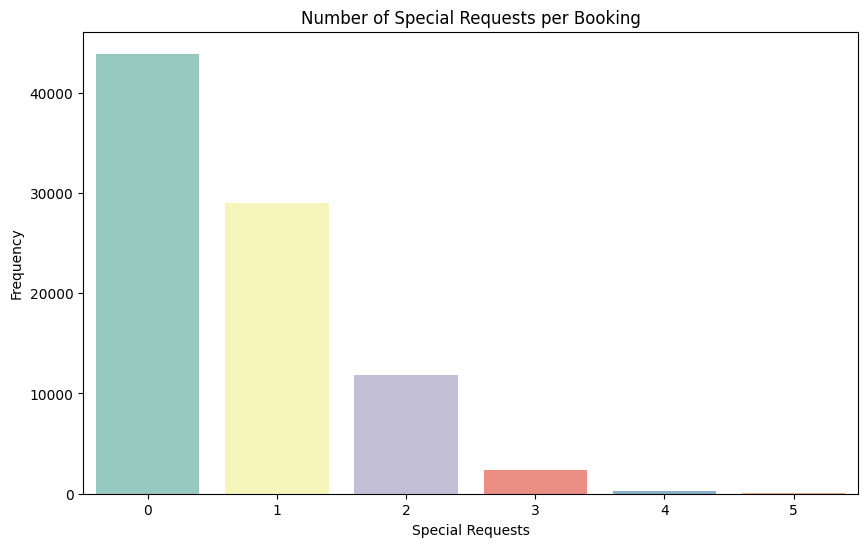

In [45]:
# Plot 1: Distribution of ADR (Average Daily Rate)
plt.figure(figsize=(10, 6))
sns.histplot(df['adr'], bins=100, kde=True)
plt.title('Distribution of ADR (Average Daily Rate)')
plt.xlabel('ADR')
plt.ylabel('Frequency')
plt.xlim(0, 500)  # Limit to remove extreme outliers
plt.show()

# Plot 2: Lead Time
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=100, kde=True, color='orange')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Total Stay
plt.figure(figsize=(10, 6))
sns.histplot(df['stay'], bins=30, kde=False, color='green')
plt.title('Distribution of Total Stay (Nights)')
plt.xlabel('Stay')
plt.ylabel('Frequency')
plt.show()

# Plot 4: Total Guests
plt.figure(figsize=(10, 6))
sns.countplot(x='total', data=df, palette='Set2')
plt.title('Total Guests per Booking')
plt.xlabel('Total Guests')
plt.ylabel('Number of Bookings')
plt.show()

# Plot 5: Special Requests
plt.figure(figsize=(10, 6))
sns.countplot(x='total_of_special_requests', data=df, palette='Set3')
plt.title('Number of Special Requests per Booking')
plt.xlabel('Special Requests')
plt.ylabel('Frequency')
plt.show()

### Demographics & Geography

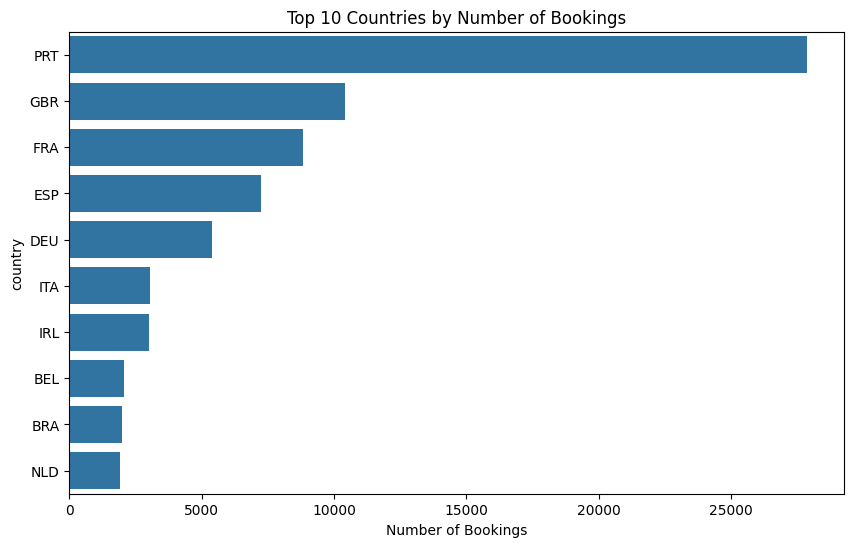

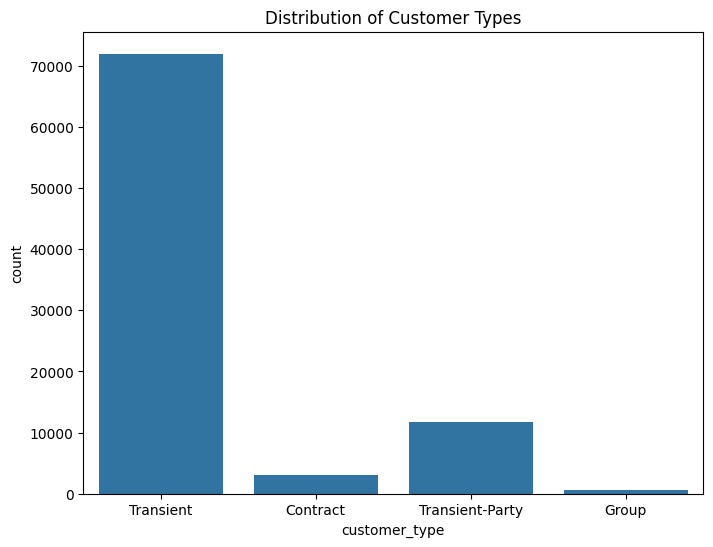

In [68]:
# Top 10 Guest Countries
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Bookings')
plt.xlabel('Number of Bookings')
plt.show()

# Customer Types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='customer_type')
plt.title('Distribution of Customer Types')
plt.show()


### Bivariate & Multivariate Analysis

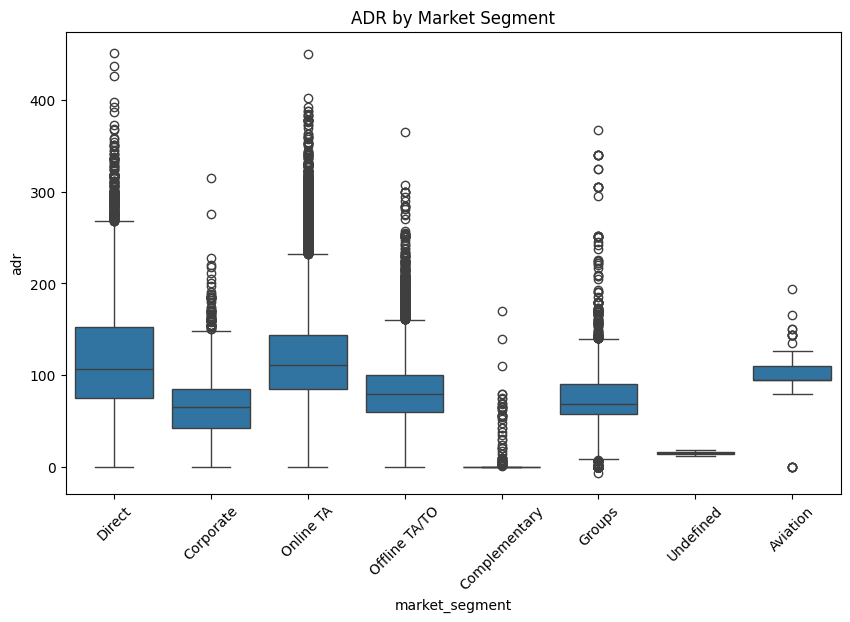

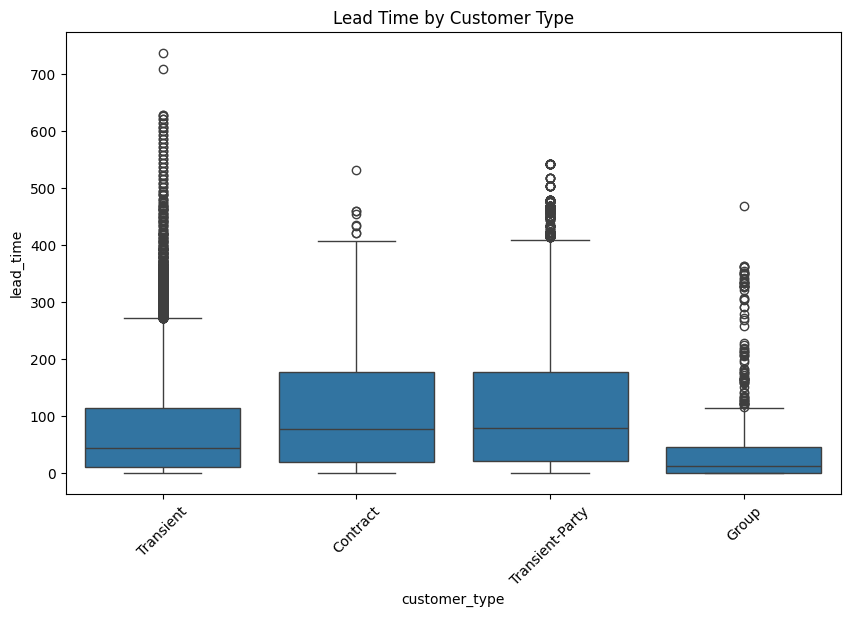

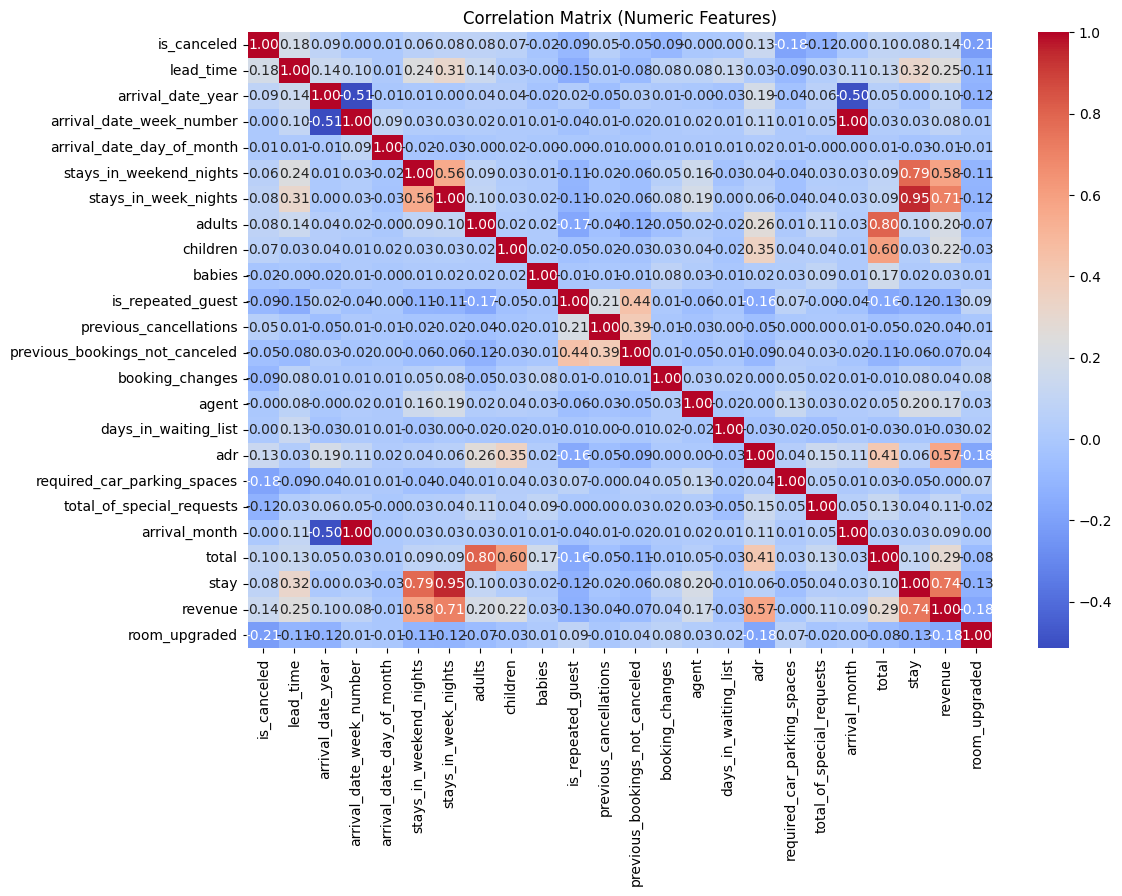

In [67]:
# ADR by Market Segment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='market_segment', y='adr')
plt.title('ADR by Market Segment')
plt.xticks(rotation=45)
plt.show()

# Lead Time by Customer Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='customer_type', y='lead_time')
plt.title('Lead Time by Customer Type')
plt.xticks(rotation=45)
plt.show()

# Heatmap of Numeric Correlation
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(numeric_cols, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

### Time-Series Analysis of Booking Trends

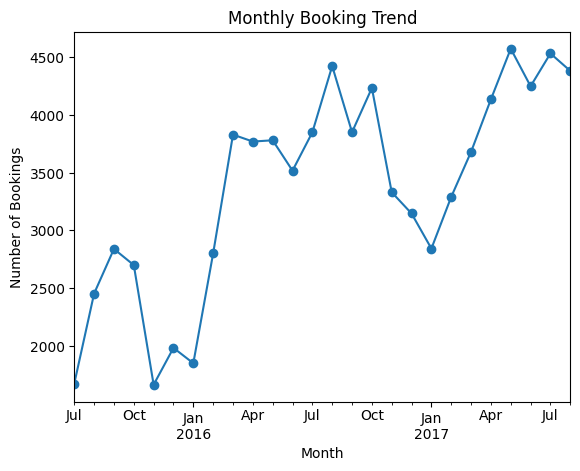

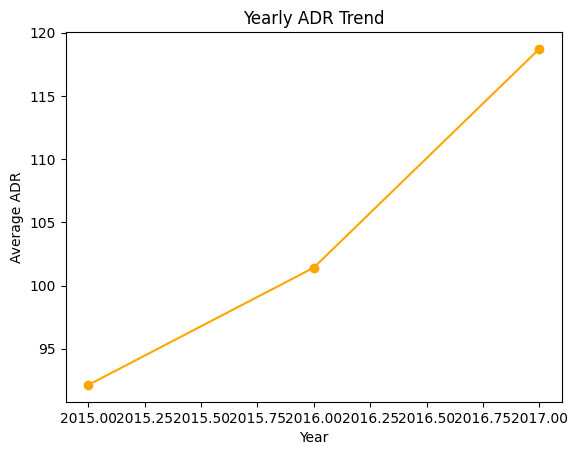

In [61]:
# Monthly bookings trend
monthly_bookings = df.groupby(df['date'].dt.to_period('M')).size()
monthly_bookings.plot(kind='line', marker='o')
plt.title('Monthly Booking Trend')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

# Yearly ADR trend
yearly_adr = df.groupby('arrival_date_year')['adr'].mean()
yearly_adr.plot(kind='line', marker='o', color='orange')
plt.title('Yearly ADR Trend')
plt.xlabel('Year')
plt.ylabel('Average ADR')
plt.show()

### Market Segment and ADR Comparison

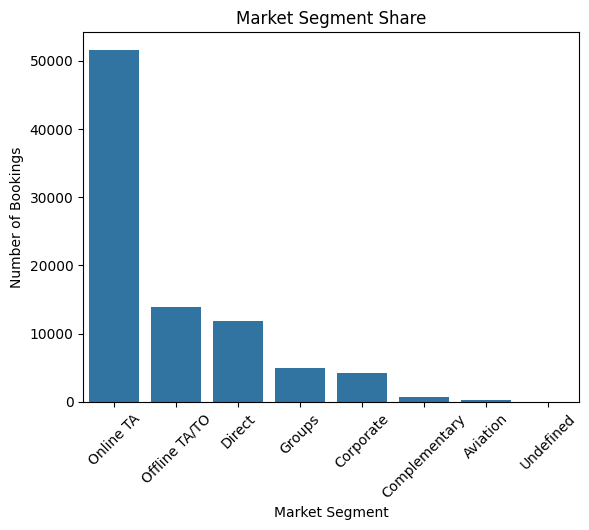

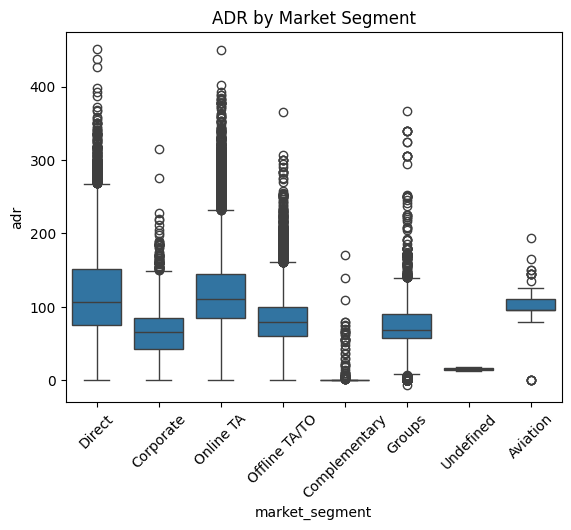

In [65]:
# Market segment share
segment_counts = df['market_segment'].value_counts()
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Market Segment Share')
plt.ylabel('Number of Bookings')
plt.xlabel('Market Segment')
plt.xticks(rotation=45)
plt.show()

# ADR by market segment
sns.boxplot(x='market_segment', y='adr', data=df)
plt.title('ADR by Market Segment')
plt.xticks(rotation=45)
plt.show()

### Booking Lead Time Analysis

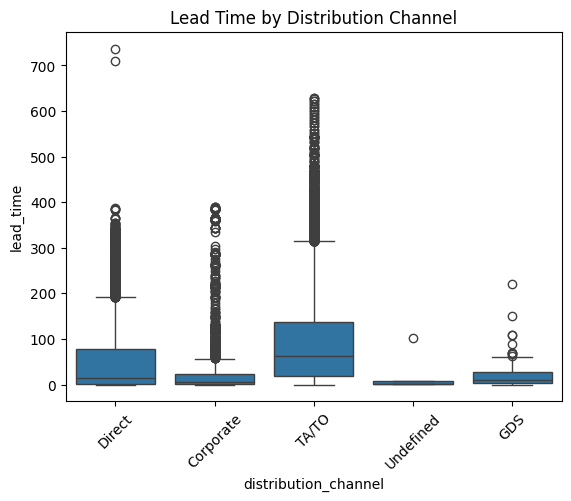

In [84]:
# Lead time by distribution channel
sns.boxplot(x='distribution_channel', y='lead_time', data=df)
plt.title('Lead Time by Distribution Channel')
plt.xticks(rotation=45)
plt.show()

### Corelation Analysis

In [49]:
num_df = df.select_dtypes(include=['int64', 'float64'])

In [56]:
pearson_corr = num_df.corr(method='pearson')

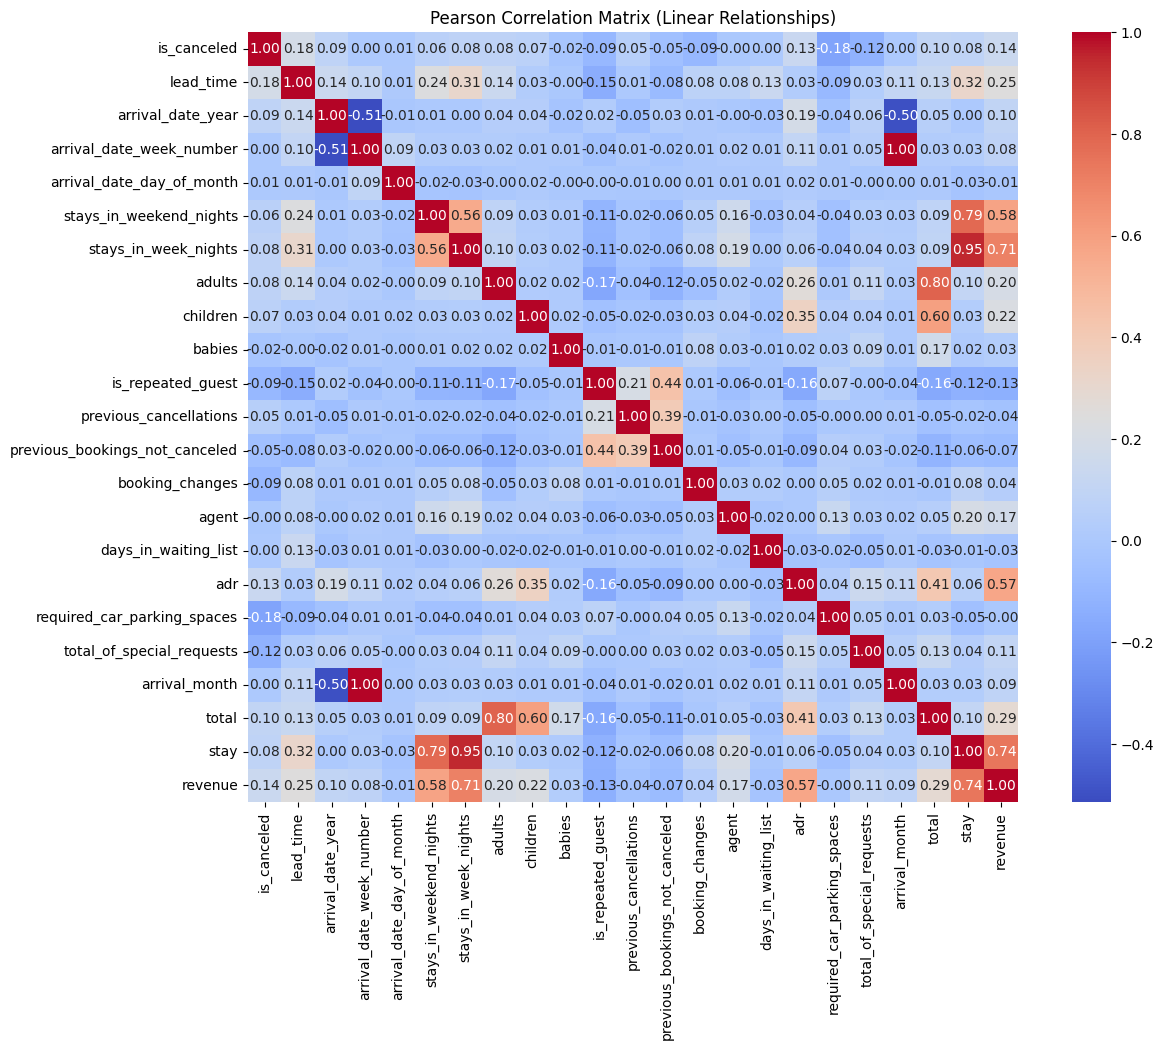

In [57]:
plt.figure(figsize=(14, 10))
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Pearson Correlation Matrix (Linear Relationships)')
plt.show()

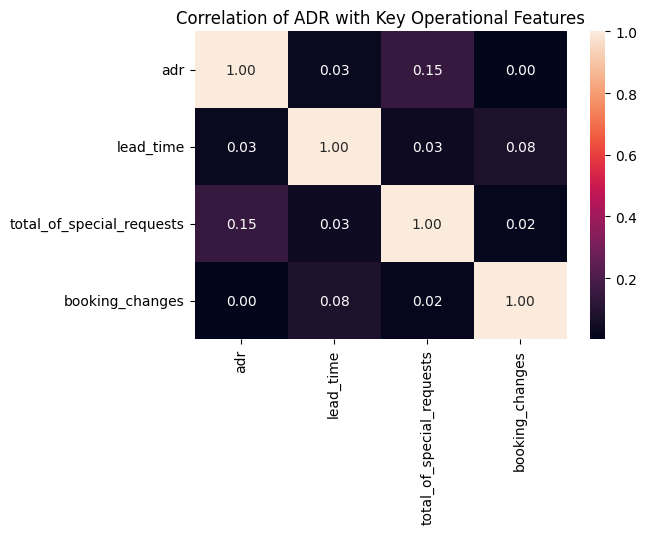

In [52]:
col = ['adr', 'lead_time', 'total_of_special_requests', 'booking_changes']

# Subset correlation matrix
df1 = num_df[col].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(df1, annot=True, cmap='rocket', fmt=".2f")
plt.title('Correlation of ADR with Key Operational Features')
plt.show()

### Hypothesis testing

In [54]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway

In [178]:
#Test 2 - two sample t test

In [179]:
df['room_upgraded'] = (df['assigned_room_type'] != df['reserved_room_type']).astype(int)

In [180]:
upgraded = df[df['room_upgraded'] == 1]['lead_time']
not_upgraded = df[df['room_upgraded'] == 0]['lead_time']

a = ttest_ind(upgraded, not_upgraded, equal_var=False) 

In [181]:
a

TtestResult(statistic=np.float64(-33.29599641509578), pvalue=np.float64(2.9959736396440906e-236), df=np.float64(18832.21394191763))

In [76]:
#Test 1 - t-test

In [75]:
adr_online_ta = df[df['distribution_channel'] == 'TA/TO']['adr']
adr_direct = df[df['distribution_channel'] == 'Direct']['adr']

t = ttest_ind(adr_online_ta, adr_direct, equal_var=False)  

In [77]:
t

TtestResult(statistic=np.float64(-1.1159029937647396), pvalue=np.float64(0.2644803080178932), df=np.float64(16106.622686752205))

In [78]:
# Test 3 - One way ANOVA

In [79]:
grouped_stay = [group['stay'].values for name, group in df.groupby('customer_type')]

one_anova = f_oneway(*grouped_stay)

In [80]:
one_anova

F_onewayResult(statistic=np.float64(880.628427292789), pvalue=np.float64(0.0))

### Key Business Questions Exploration

In [91]:
# 1. What influences ADR the most?
selected_cols = ['adr', 'lead_time', 'adults', 'children', 'booking_changes',
            'required_car_parking_spaces', 'total_of_special_requests',
            'stay']


corr = df[selected_cols].corr()
adr = corr['adr'].sort_values(ascending=False)

In [92]:
adr

adr                            1.000000
children                       0.345805
adults                         0.263205
total_of_special_requests      0.146785
stay                           0.058451
required_car_parking_spaces    0.041451
lead_time                      0.025554
booking_changes                0.001547
Name: adr, dtype: float64

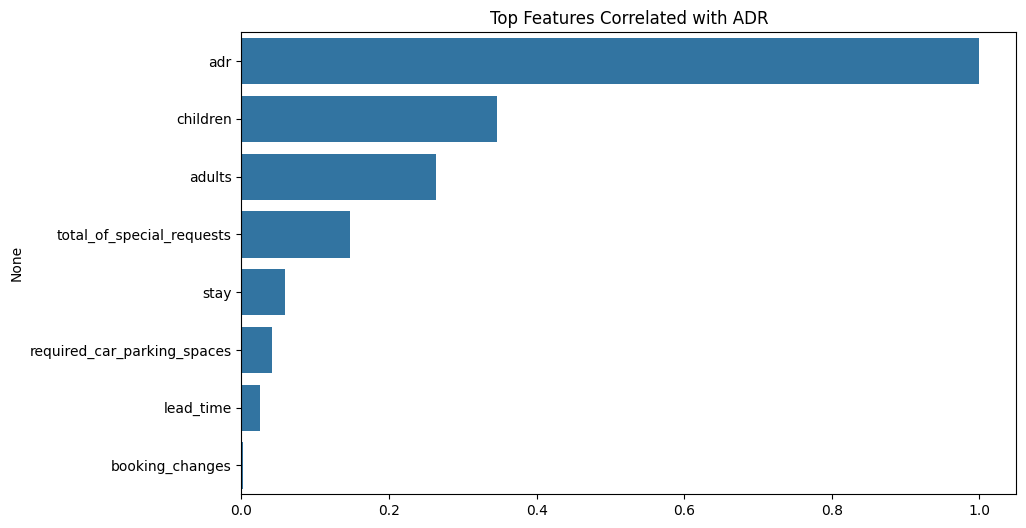

In [94]:
plt.figure(figsize=(10, 6))
sns.barplot(x=adr.values, y=adr.index)
plt.title("Top Features Correlated with ADR")
plt.show()

In [96]:
#2. Do guests who book earlier tend to request more changes?

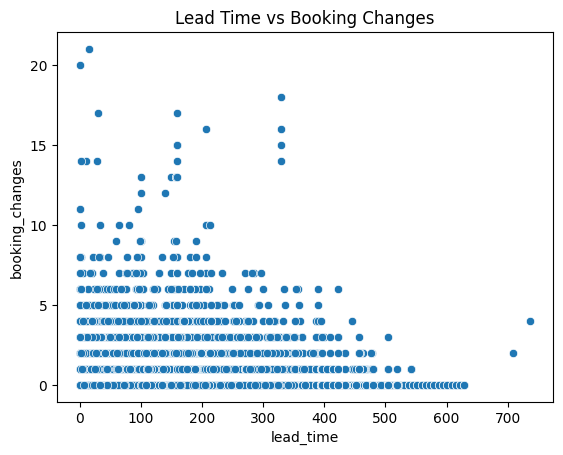

In [97]:
sns.scatterplot(data=df, x='lead_time', y='booking_changes')
plt.title("Lead Time vs Booking Changes")
plt.show()

In [99]:
df['lead_time'].corr(df['booking_changes'])

np.float64(0.07695282330277216)

In [105]:
#3. Are there pricing or booking differences across countries?

In [113]:
top = df['country'].value_counts().head(10).index
country = df[df['country'].isin(top)]

In [114]:
top

Index(['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD'], dtype='object', name='country')

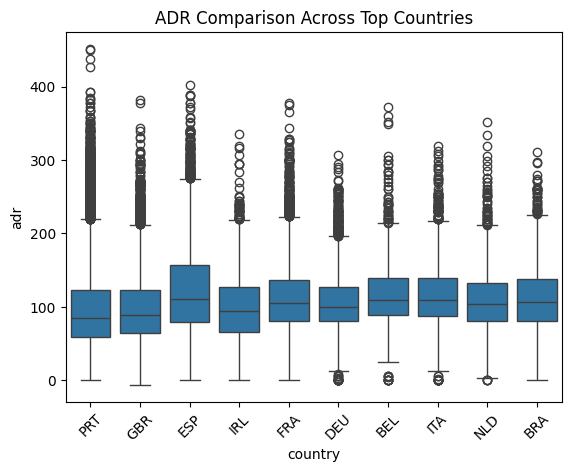

In [108]:
sns.boxplot(data=country, x='country', y='adr')
plt.title("ADR Comparison Across Top Countries")
plt.xticks(rotation=45)
plt.show()

In [115]:
#4. Is there a pattern in room upgrades or reassignment?

14.99


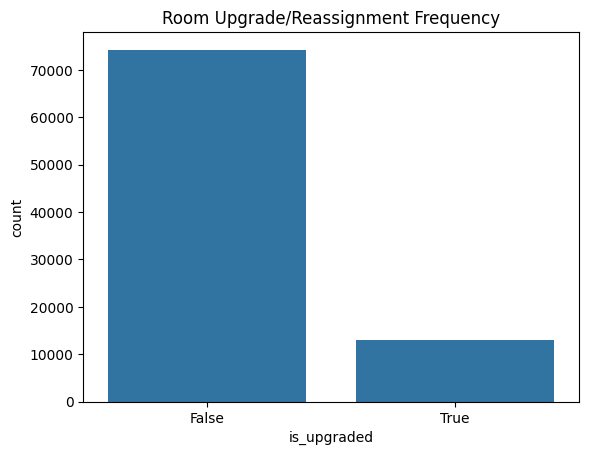

In [118]:
df['is_upgraded'] = df['reserved_room_type'] != df['assigned_room_type']

upgrade_rate = df['is_upgraded'].mean()
print(round(upgrade_rate * 100, 2))

sns.countplot(x='is_upgraded', data=df)
plt.title("Room Upgrade/Reassignment Frequency")
plt.show()

In [119]:
#5. Are reserved room types consistently matched with assigned room types?

In [120]:
match_rate = (df['reserved_room_type'] == df['assigned_room_type']).mean()
print(round(match_rate * 100, 2))

85.01


In [122]:
#6. What are the most common guest demographics (e.g., group size, nationality)?

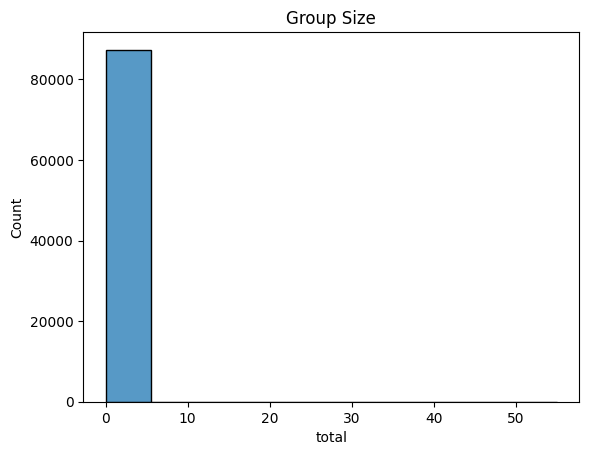

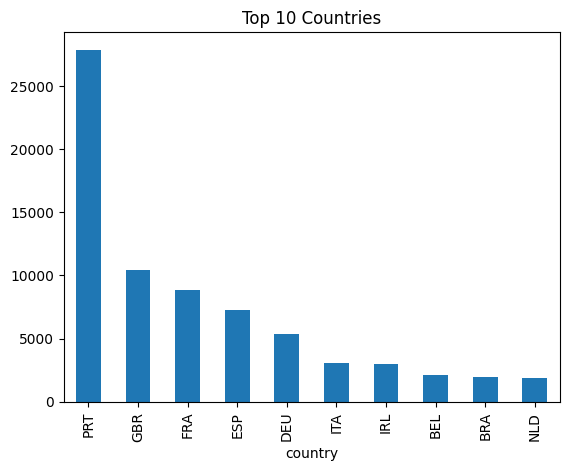

In [125]:
# Group size
sns.histplot(df['total'], bins=10)
plt.title("Group Size")
plt.show()

# Top countries
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries")
plt.show()

In [127]:
#7. Are there patterns in guest types (e.g., transient vs. corporate) that influence booking behavior?

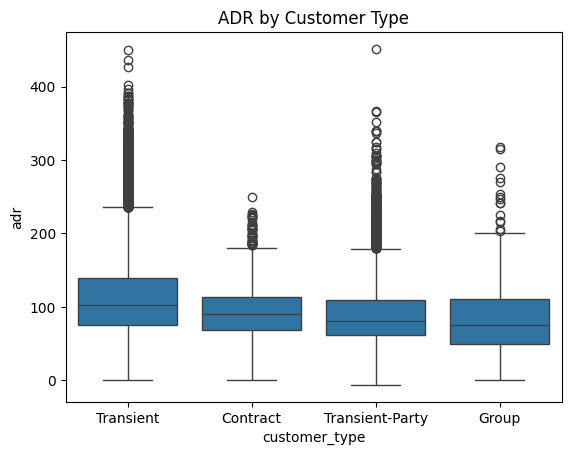

In [128]:
sns.boxplot(data=df, x='customer_type', y='adr')
plt.title("ADR by Customer Type")
plt.show()

In [129]:
#8. How does booking lead time vary across customer types and countries?

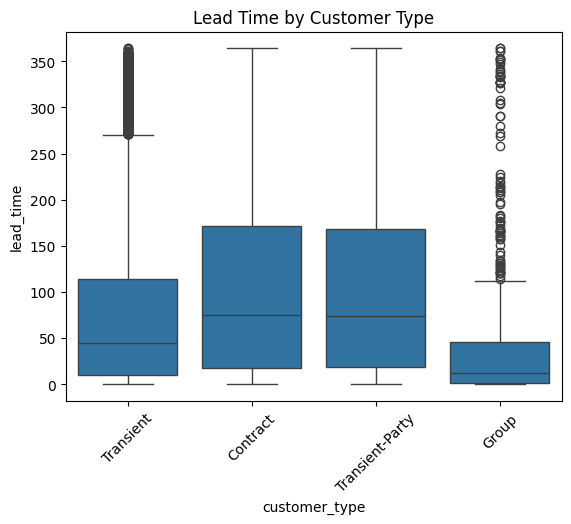

In [132]:
sns.boxplot(data=df[df['lead_time'] < 365], x='customer_type', y='lead_time')
plt.title("Lead Time by Customer Type")
plt.xticks(rotation=45)
plt.show()

In [134]:
#9. Are longer lead times associated with fewer booking changes or cancellations?

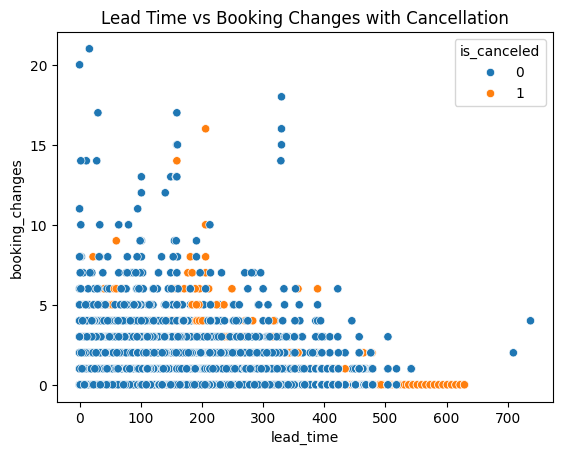

In [135]:
sns.scatterplot(data=df, x='lead_time', y='booking_changes', hue='is_canceled')
plt.title("Lead Time vs Booking Changes with Cancellation")
plt.show()

In [136]:
#10. What is the typical duration of stay, and how does it vary by customer type or segment?

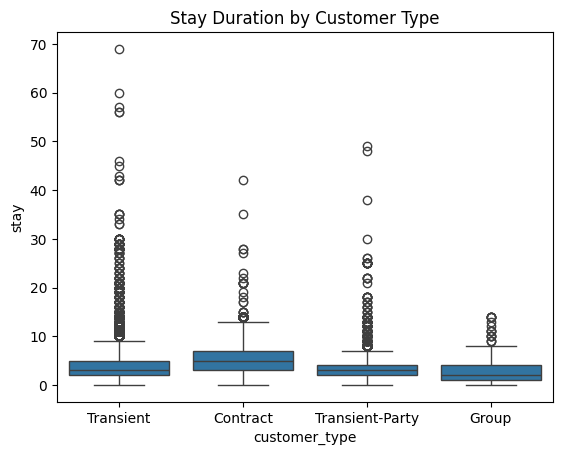

In [137]:
sns.boxplot(data=df, x='customer_type', y='stay')
plt.title("Stay Duration by Customer Type")
plt.show()

In [138]:
#11. How often are guests upgraded or reassigned to a different room type?

In [139]:
upgrade_freq = df['is_upgraded'].value_counts(normalize=True)
print(upgrade_freq)

is_upgraded
False    0.850102
True     0.149898
Name: proportion, dtype: float64


In [141]:
#12. Are guests who make special requests more likely to experience booking changes or longer stays?

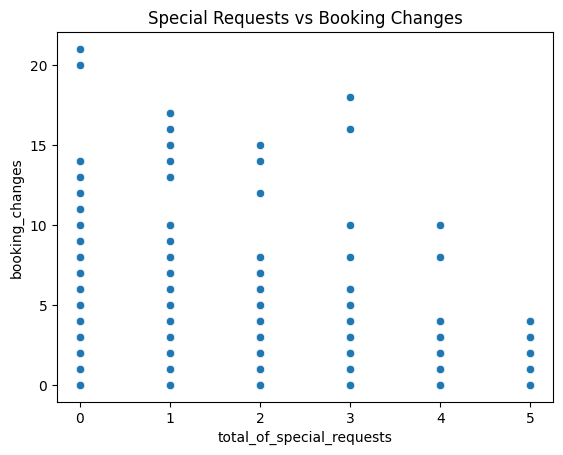

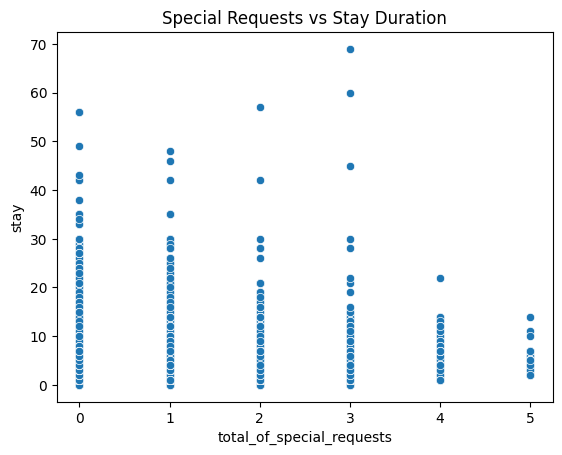

In [143]:
sns.scatterplot(data=df, x='total_of_special_requests', y='booking_changes')
plt.title("Special Requests vs Booking Changes")
plt.show()

sns.scatterplot(data=df, x='total_of_special_requests', y='stay')
plt.title("Special Requests vs Stay Duration")
plt.show()

In [147]:
#13. Do certain market segments or distribution channels show higher booking consistency or revenue?

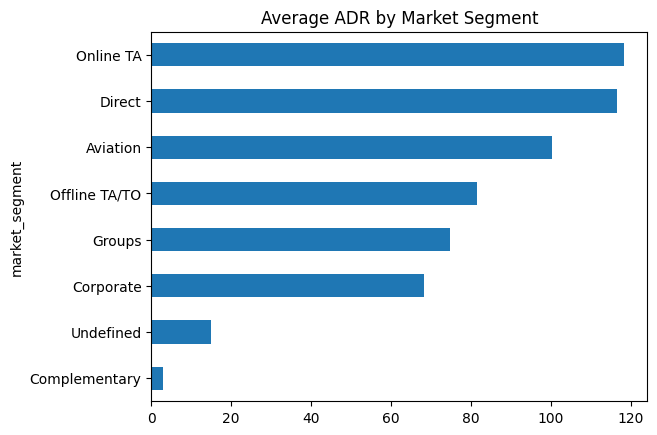

In [148]:
segment_adr = df.groupby('market_segment')['adr'].mean().sort_values()
segment_adr.plot(kind='barh')
plt.title("Average ADR by Market Segment")
plt.show()

In [149]:
#14. What factors are most strongly associated with higher ADR?

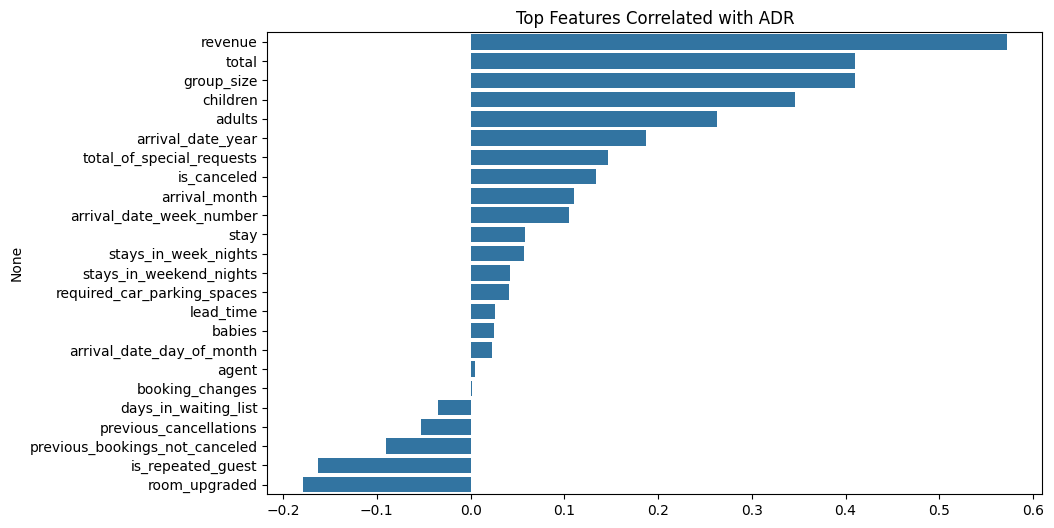

In [150]:
num_cols = df.select_dtypes(include='number')
corr = num_cols.corr()

# Sort top correlations with ADR
adr_corr = corr['adr'].drop('adr').sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=adr_corr.values, y=adr_corr.index)
plt.title("Top Features Correlated with ADR")
plt.show()

In [151]:
#15. Are there customer types or segments consistently contributing to higher revenue?

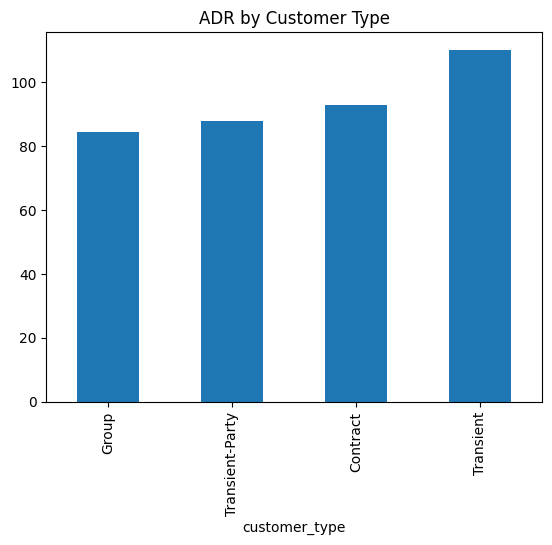

In [152]:
revenue_by_type = df.groupby('customer_type')['adr'].mean().sort_values()
revenue_by_type.plot(kind='bar')
plt.title("ADR by Customer Type")
plt.show()

In [153]:
#16. Do bookings with more lead time or from specific countries yield higher ADR?

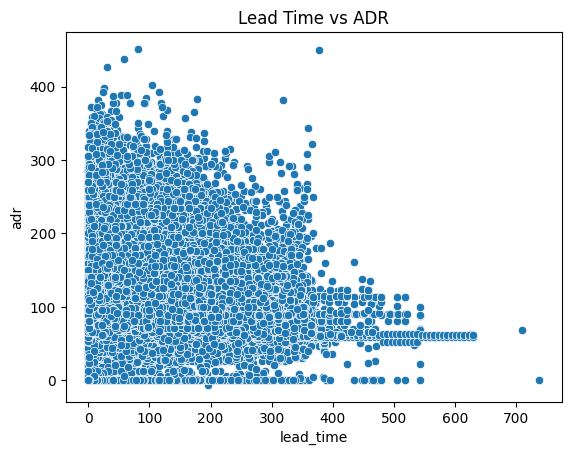

In [155]:
sns.scatterplot(data=df, x='lead_time', y='adr')
plt.title("Lead Time vs ADR")
plt.show()

In [156]:
#17. Are guests with higher ADR more likely to request special services or make booking modifications?

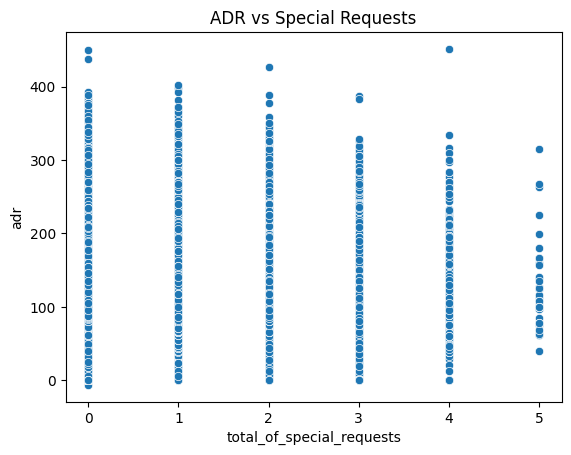

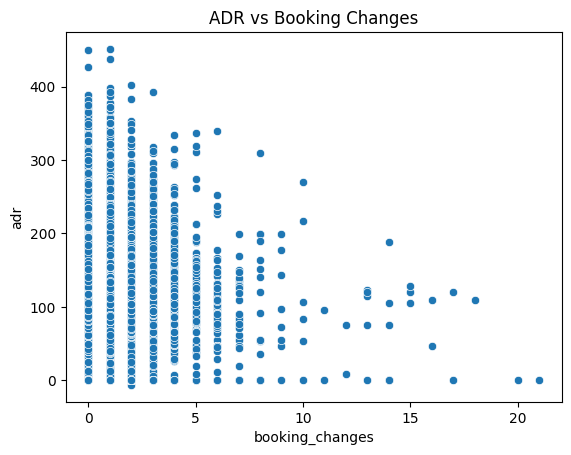

In [159]:
sns.scatterplot(data=df, x='total_of_special_requests', y='adr')
plt.title("ADR vs Special Requests")
plt.show()

sns.scatterplot(data=df, x='booking_changes', y='adr')
plt.title("ADR vs Booking Changes")
plt.show()

In [161]:
#18. Do guests from different countries behave differently in terms of booking timing or stay length?

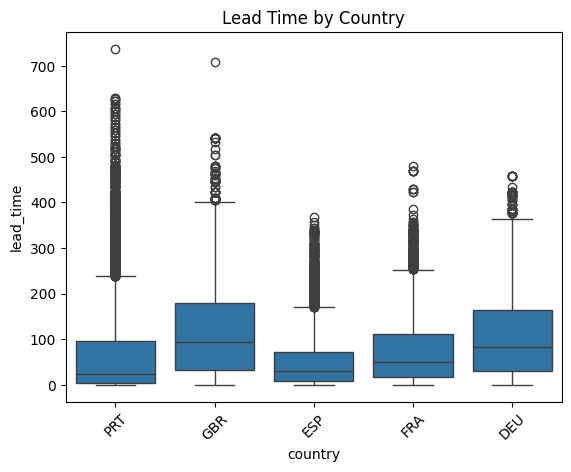

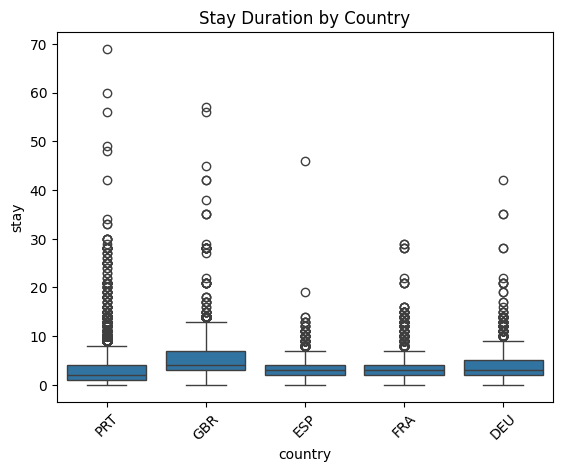

In [163]:
top_countries = df['country'].value_counts().head(5).index
subset = df[df['country'].isin(top_countries)]

sns.boxplot(data=subset, x='country', y='lead_time')
plt.title("Lead Time by Country")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=subset, x='country', y='stay')
plt.title("Stay Duration by Country")
plt.xticks(rotation=45)
plt.show()

In [165]:
#19.Are guests who make booking changes more likely to request additional services or cancel?

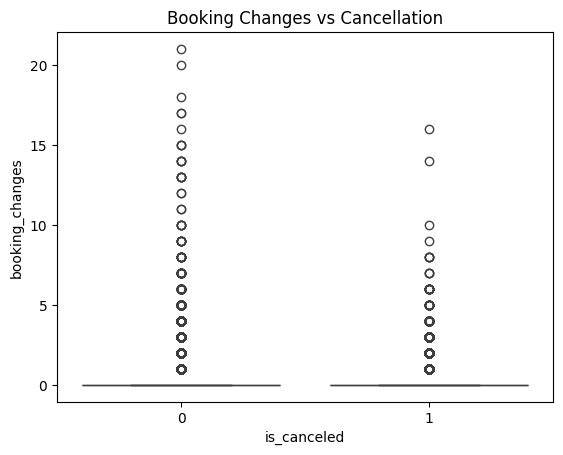

In [168]:
sns.boxplot(data=df, x='is_canceled', y='booking_changes')
plt.title("Booking Changes vs Cancellation")
plt.show()